In [1]:
import scipy.io.wavfile as wav
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fs, x1 = wav.read('samples/recording1.wav')
x1 = x1 / np.max(abs(x1))

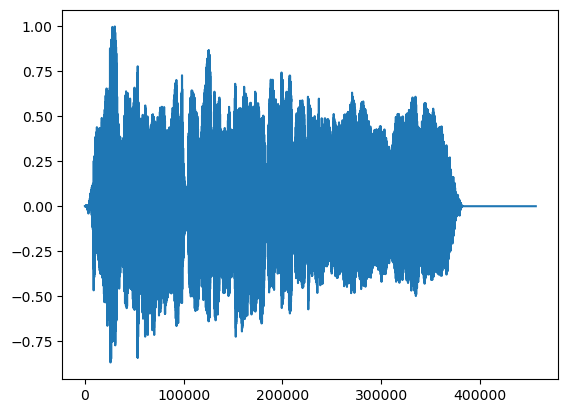

In [3]:
plt.plot(x1)

In [79]:
f01, voiced_flag, voiced_probs = librosa.pyin(x1, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), frame_length=2048, hop_length=1024)
f01 = f01[~np.isnan(f01)]

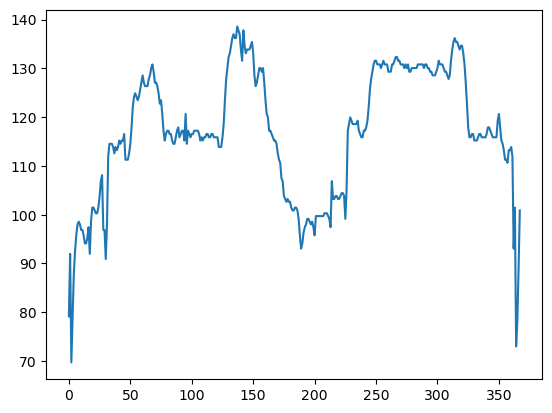

In [83]:
plt.plot(f01)

In [84]:
fs, x2 = wav.read('samples/recording2.wav')
x2 = x2 / np.max(abs(x2))

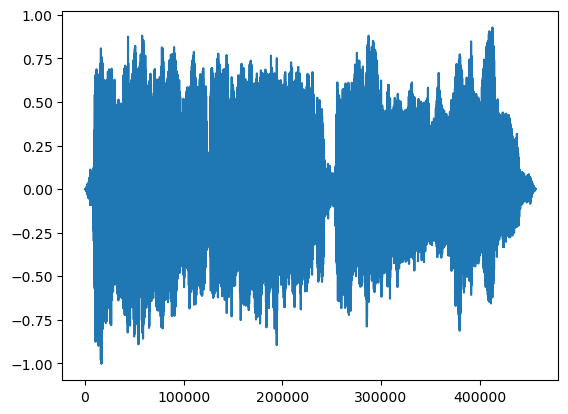

In [85]:
plt.plot(x2)

In [86]:
f02, voiced_flag, voiced_probs = librosa.pyin(x2, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), frame_length=2048, hop_length=1024)
f02 = f02[~np.isnan(f02)]

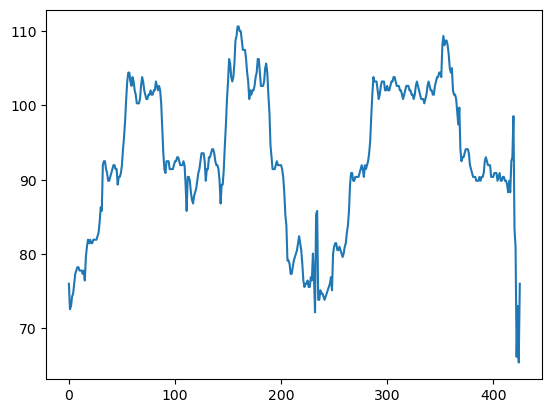

In [87]:
plt.plot(f02)

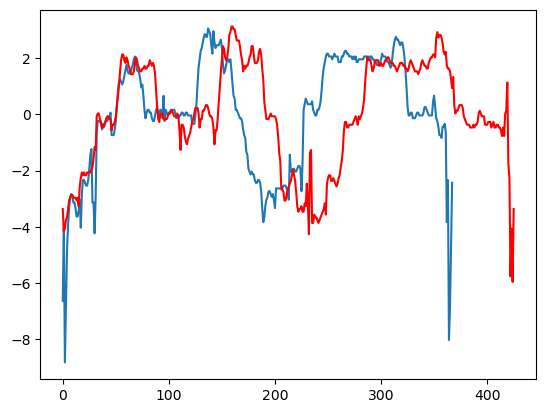

In [88]:
f01 = librosa.hz_to_midi(f01)
f02 = librosa.hz_to_midi(f02)
f01 = f01 - np.mean(f01)
f02 = f02 - np.mean(f02)
plt.plot(f01)
plt.plot(f02, c='r')

In [89]:
D, wp = librosa.sequence.dtw(f01, f02)

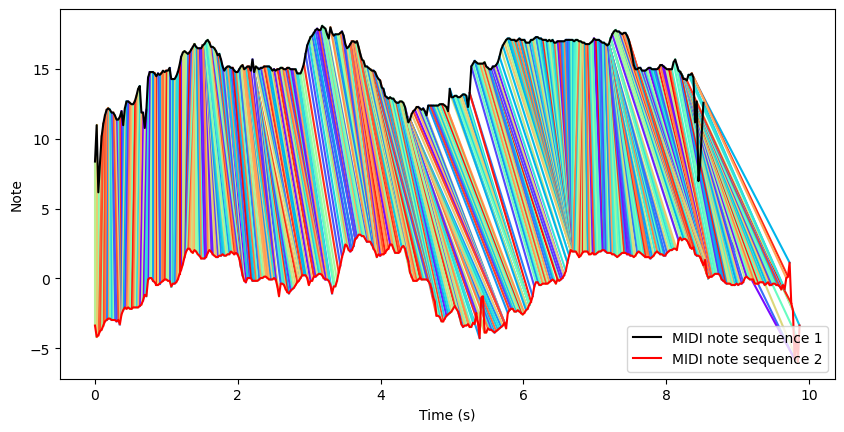

In [96]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(wp)))
timeSteps1 = np.arange(len(f01)) * 1024 / fs
timeSteps2 = np.arange(len(f02)) * 1024 / fs
plt.figure().set_figwidth(10)
for i, (idx1, idx2) in enumerate(wp):
    color = np.random.randint(len(colors))
    plt.plot([wp[i][0] * 1024 / fs, wp[i][1] * 1024 / fs], [f01[wp[i][0]] + 15, f02[wp[i][1]]], color=colors[color])

plt.xlabel('Time (s)')
plt.ylabel('Note')
plt.plot(timeSteps1, f01 + 15, c='black', label='MIDI note sequence 1')
plt.plot(timeSteps2, f02, c='r', label='MIDI note sequence 2')
plt.legend()

In [97]:
D2, wp2 = librosa.sequence.dtw(f01, f02, global_constraints=True, band_rad=0.001, subseq=True)

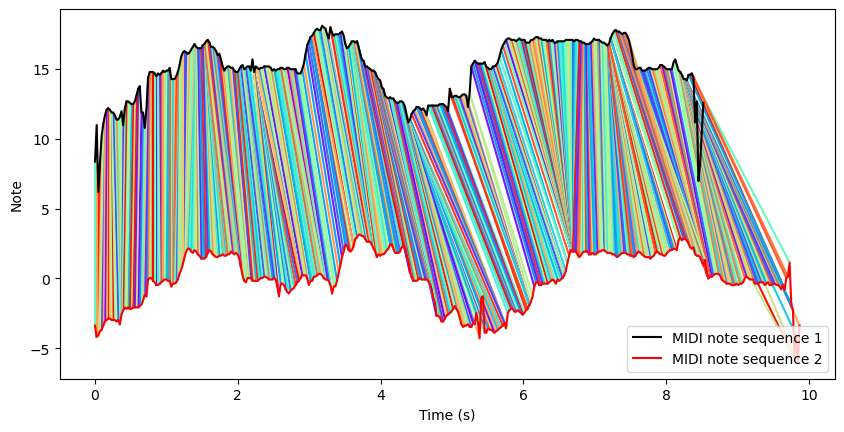

In [99]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(wp)))
timeSteps1 = np.arange(len(f01)) * 1024 / fs
timeSteps2 = np.arange(len(f02)) * 1024 / fs
plt.figure().set_figwidth(10)
for i, (idx1, idx2) in enumerate(wp):
    color = np.random.randint(len(colors))
    plt.plot([wp[i][0] * 1024 / fs, wp[i][1] * 1024 / fs], [f01[wp[i][0]] + 15, f02[wp[i][1]]], color=colors[color])
    
plt.xlabel('Time (s)')
plt.ylabel('Note')
plt.plot(timeSteps1, f01 + 15, c='black', label='MIDI note sequence 1')
plt.plot(timeSteps2, f02, c='r', label='MIDI note sequence 2')
plt.legend()
plt.savefig('dtw.png')